In [106]:
import glob
from functools import reduce

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### PoC: Plot events

In [107]:
events = [
    {'name': 'begin_epoch', 'rank': 1, 'time': 1691513065.9944763},
    {'name': 'master_broadcast', 'rank': 1, 'time': 1691513065.99505},
    {'name': 'begin_fit', 'rank': 1, 'time': 1691513066.3123784},
    {'name': 'end_fit', 'rank': 1, 'time': 1691513066.9175467},
    {'name': 'master_gather', 'rank': 1, 'time': 1691513066.9182863},
    {'name': 'end_epoch', 'rank': 1, 'time': 1691513067.0374613},
    {'name': 'begin_epoch', 'rank': 1, 'time': 1691513067.037463},
    {'name': 'master_broadcast', 'rank': 1, 'time': 1691513067.038417},
    {'name': 'begin_fit', 'rank': 1, 'time': 1691513068.5536344},
    {'name': 'end_fit', 'rank': 1, 'time': 1691513068.9345007},
    {'name': 'master_gather', 'rank': 1, 'time': 1691513068.9352622},
    {'name': 'end_epoch', 'rank': 1, 'time': 1691513069.1021223},
    {'name': 'begin_epoch', 'rank': 1, 'time': 1691513069.1021242},
    {'name': 'master_broadcast', 'rank': 1, 'time': 1691513069.1031046},
    {'name': 'begin_fit', 'rank': 1, 'time': 1691513070.142765},
    {'name': 'end_fit', 'rank': 1, 'time': 1691513070.5149772},
    {'name': 'master_gather', 'rank': 1, 'time': 1691513070.5157485},
    {'name': 'end_epoch', 'rank': 1, 'time': 1691513070.5855577},
    {'name': 'begin_epoch', 'rank': 1, 'time': 1691513070.5855594},
    {'name': 'master_broadcast', 'rank': 1, 'time': 1691513070.5864909},
    {'name': 'begin_fit', 'rank': 1, 'time': 1691513071.4724813},
    {'name': 'end_fit', 'rank': 1, 'time': 1691513071.8789158},
    {'name': 'master_gather', 'rank': 1, 'time': 1691513071.8796713},
    {'name': 'end_epoch', 'rank': 1, 'time': 1691513071.9541922},
    {'name': 'begin_epoch', 'rank': 1, 'time': 1691513071.9541938},
    {'name': 'master_broadcast', 'rank': 1, 'time': 1691513071.95514},
    {'name': 'begin_fit', 'rank': 1, 'time': 1691513072.9175997},
    {'name': 'end_fit', 'rank': 1, 'time': 1691513073.322898},
    {'name': 'master_gather', 'rank': 1, 'time': 1691513073.323644},
    {'name': 'end_epoch', 'rank': 1, 'time': 1691513073.4452074},
    {'name': 'begin_epoch', 'rank': 3, 'time': 1691513066.0084765},
    {'name': 'master_broadcast', 'rank': 3, 'time': 1691513066.0091898},
    {'name': 'begin_fit', 'rank': 3, 'time': 1691513066.2823505},
    {'name': 'end_fit', 'rank': 3, 'time': 1691513067.3136344},
    {'name': 'master_gather', 'rank': 3, 'time': 1691513067.31451},
    {'name': 'end_epoch', 'rank': 3, 'time': 1691513067.579635},
    {'name': 'begin_epoch', 'rank': 3, 'time': 1691513067.5796368},
    {'name': 'master_broadcast', 'rank': 3, 'time': 1691513067.5807147},
    {'name': 'begin_fit', 'rank': 3, 'time': 1691513068.5489721},
    {'name': 'end_fit', 'rank': 3, 'time': 1691513069.0353537},
    {'name': 'master_gather', 'rank': 3, 'time': 1691513069.0363097},
    {'name': 'end_epoch', 'rank': 3, 'time': 1691513069.1306214},
    {'name': 'begin_epoch', 'rank': 3, 'time': 1691513069.1306238},
    {'name': 'master_broadcast', 'rank': 3, 'time': 1691513069.1317735},
    {'name': 'begin_fit', 'rank': 3, 'time': 1691513070.1216464},
    {'name': 'end_fit', 'rank': 3, 'time': 1691513070.599253},
    {'name': 'master_gather', 'rank': 3, 'time': 1691513070.6001525},
    {'name': 'end_epoch', 'rank': 3, 'time': 1691513070.648522},
    {'name': 'begin_epoch', 'rank': 3, 'time': 1691513070.6485238},
    {'name': 'master_broadcast', 'rank': 3, 'time': 1691513070.649546},
    {'name': 'begin_fit', 'rank': 3, 'time': 1691513071.5111835},
    {'name': 'end_fit', 'rank': 3, 'time': 1691513071.9808545},
    {'name': 'master_gather', 'rank': 3, 'time': 1691513071.9817727},
    {'name': 'end_epoch', 'rank': 3, 'time': 1691513072.1845567},
    {'name': 'begin_epoch', 'rank': 3, 'time': 1691513072.184559},
    {'name': 'master_broadcast', 'rank': 3, 'time': 1691513072.185646},
    {'name': 'begin_fit', 'rank': 3, 'time': 1691513073.1448972},
    {'name': 'end_fit', 'rank': 3, 'time': 1691513073.6293879},
    {'name': 'master_gather', 'rank': 3, 'time': 1691513073.6303082},
    {'name': 'end_epoch', 'rank': 3, 'time': 1691513073.7886326},
    {'name': 'begin_epoch', 'rank': 2, 'time': 1691513065.9763062},
    {'name': 'master_broadcast', 'rank': 2, 'time': 1691513065.9769804},
    {'name': 'begin_fit', 'rank': 2, 'time': 1691513066.2901416},
    {'name': 'end_fit', 'rank': 2, 'time': 1691513066.9263077},
    {'name': 'master_gather', 'rank': 2, 'time': 1691513066.927235},
    {'name': 'end_epoch', 'rank': 2, 'time': 1691513066.9727767},
    {'name': 'begin_epoch', 'rank': 2, 'time': 1691513066.9727783},
    {'name': 'master_broadcast', 'rank': 2, 'time': 1691513066.9737873},
    {'name': 'begin_fit', 'rank': 2, 'time': 1691513068.547693},
    {'name': 'end_fit', 'rank': 2, 'time': 1691513068.9633236},
    {'name': 'master_gather', 'rank': 2, 'time': 1691513068.9641907},
    {'name': 'end_epoch', 'rank': 2, 'time': 1691513069.0427096},
    {'name': 'begin_epoch', 'rank': 2, 'time': 1691513069.0427113},
    {'name': 'master_broadcast', 'rank': 2, 'time': 1691513069.0437307},
    {'name': 'begin_fit', 'rank': 2, 'time': 1691513070.1304283},
    {'name': 'end_fit', 'rank': 2, 'time': 1691513070.550761},
    {'name': 'master_gather', 'rank': 2, 'time': 1691513070.5516434},
    {'name': 'end_epoch', 'rank': 2, 'time': 1691513070.6385298},
    {'name': 'begin_epoch', 'rank': 2, 'time': 1691513070.6385317},
    {'name': 'master_broadcast', 'rank': 2, 'time': 1691513070.6395648},
    {'name': 'begin_fit', 'rank': 2, 'time': 1691513071.3658528},
    {'name': 'end_fit', 'rank': 2, 'time': 1691513071.8163886},
    {'name': 'master_gather', 'rank': 2, 'time': 1691513071.8174436},
    {'name': 'end_epoch', 'rank': 2, 'time': 1691513071.907871},
    {'name': 'begin_epoch', 'rank': 2, 'time': 1691513071.9078724},
    {'name': 'master_broadcast', 'rank': 2, 'time': 1691513071.9089346},
    {'name': 'begin_fit', 'rank': 2, 'time': 1691513073.2300396},
    {'name': 'end_fit', 'rank': 2, 'time': 1691513073.6890414},
    {'name': 'master_gather', 'rank': 2, 'time': 1691513073.6899023},
    {'name': 'end_epoch', 'rank': 2, 'time': 1691513073.8273299},
    {'name': 'begin_epoch', 'rank': 0, 'time': 1691513066.0451696},
    {'name': 'master_broadcast', 'rank': 0, 'time': 1691513066.0459597},
    {'name': 'master_gather', 'rank': 0, 'time': 1691513066.2649014},
    {'name': 'end_epoch', 'rank': 0, 'time': 1691513068.3812673},
    {'name': 'begin_epoch', 'rank': 0, 'time': 1691513068.3812697},
    {'name': 'master_broadcast', 'rank': 0, 'time': 1691513068.3821683},
    {'name': 'master_gather', 'rank': 0, 'time': 1691513068.512269},
    {'name': 'end_epoch', 'rank': 0, 'time': 1691513069.9100087},
    {'name': 'begin_epoch', 'rank': 0, 'time': 1691513069.910011},
    {'name': 'master_broadcast', 'rank': 0, 'time': 1691513069.9107964},
    {'name': 'master_gather', 'rank': 0, 'time': 1691513070.108383},
    {'name': 'end_epoch', 'rank': 0, 'time': 1691513071.2780411},
    {'name': 'begin_epoch', 'rank': 0, 'time': 1691513071.2780437},
    {'name': 'master_broadcast', 'rank': 0, 'time': 1691513071.278832},
    {'name': 'master_gather', 'rank': 0, 'time': 1691513071.4532275},
    {'name': 'end_epoch', 'rank': 0, 'time': 1691513072.7777588},
    {'name': 'begin_epoch', 'rank': 0, 'time': 1691513072.7777615},
    {'name': 'master_broadcast', 'rank': 0, 'time': 1691513072.77856},
    {'name': 'master_gather', 'rank': 0, 'time': 1691513073.073236},
    {'name': 'end_epoch', 'rank': 0, 'time': 1691513074.4030921},
]
df = pd.DataFrame(events)
df


,name,rank,time
0,begin_epoch,1,1.691513e+09
1,master_broadcast,1,1.691513e+09
2,begin_fit,1,1.691513e+09
3,end_fit,1,1.691513e+09
4,master_gather,1,1.691513e+09
...,...,...,...
105,end_epoch,0,1.691513e+09
106,begin_epoch,0,1.691513e+09
107,master_broadcast,0,1.691513e+09
108,master_gather,0,1.691513e+09


In [108]:
ranks = df['rank'].unique()
min_rank = min(ranks)
max_rank = max(ranks)


event_names = df['name'].unique()
event_name_colors = dict(zip(event_names, sns.color_palette('hls', len(event_names))))
event_name_offsets = dict(zip(event_names, range(len(event_names))))

print(event_names)
sns.color_palette('hls', len(event_names))

['begin_epoch' 'master_broadcast' 'begin_fit' 'end_fit' 'master_gather'
 'end_epoch']


[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

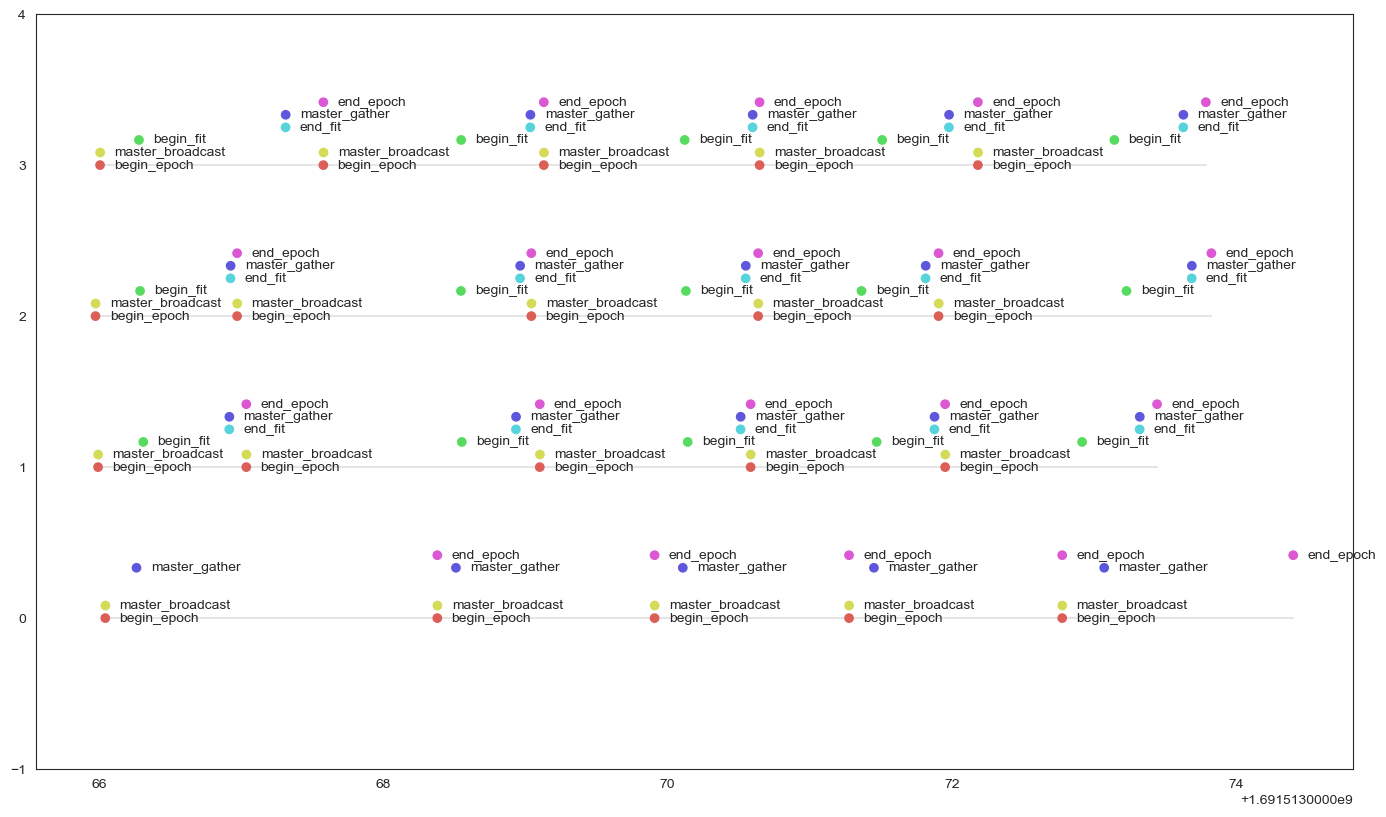

In [109]:

plt.figure(figsize=(17, 10), dpi=100)
plt.ylim(min_rank - 1, max_rank + 1)

for rank in ranks:
  plt.plot(df.query('rank == @rank').time, np.ones_like(df.query('rank == @rank').time) * rank, c='black', alpha=0.1, zorder=0)

  times = df.query('rank == @rank').time
  names = df.query('rank == @rank').name
  plt.scatter(df.query('rank == @rank').time, np.ones_like(times) * rank + [event_name_offsets[name]/12 for name in names], c=[event_name_colors[name] for name in names])

  for row in df.query('rank == @rank').itertuples():
      offset = (0.1, -0.02 + event_name_offsets[row.name] / 12)
      plt.annotate(row.name, (row.time + offset[0], rank + offset[1]))


In [110]:
# create blocks from time between begin_fit and end_fit
df

,name,rank,time
0,begin_epoch,1,1.691513e+09
1,master_broadcast,1,1.691513e+09
2,begin_fit,1,1.691513e+09
3,end_fit,1,1.691513e+09
4,master_gather,1,1.691513e+09
...,...,...,...
105,end_epoch,0,1.691513e+09
106,begin_epoch,0,1.691513e+09
107,master_broadcast,0,1.691513e+09
108,master_gather,0,1.691513e+09


### Functions

In [111]:
def load_data(path='../results/e2e-broadcast-better-gather-5/*.jsonl'):
  df = pd.concat([
      # pd.read_json(f, lines=True) for f in glob.glob('../results/e2e-better-5/*.jsonl')
      pd.read_json(f, lines=True) for f in glob.glob(path)
  ], ignore_index=True)

  # -1 second to all p2p times
  df.loc[df['method'] == 'p2p', 'time'] = df.loc[df['method'] == 'p2p', 'time'] - 1

  # set type of 'key' to string
  df['key'] = df['key'].astype(str)
  # dataset as category
  df['dataset'] = df['dataset'].astype('category')
  # map methods
  df['method'] = df['method'].map({
      's3': 'S3',
      'efs': 'EFS',
      'dynamodb': 'DynamoDB',
      'redis': 'Redis',
      'relay': 'Relay',
      'p2p': 'P2P'
  })
  # method as category
  df['method'] = df['method'].astype('category')

  # order method
  df['method'] = df['method'].cat.reorder_categories([
      "S3",
      "EFS",
      "DynamoDB",
      "Redis",
      "Relay",
      "P2P"
  ])

  df.info()
  return df

def sum_usage(a, b):
    return {k: a.get(k, 0) + b.get(k, 0) for k in set(a) | set(b)}

def sum_usage_array(arr):
    return reduce(sum_usage, arr)

### E2E

In [112]:
# df = load_data("../results/e2e-broadcast-better-gather-5/*.jsonl")
# df = load_data("../results/e2e-better-5/*.jsonl")
df = load_data("../results/e2e-2023-08-17/*.jsonl")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   key      354 non-null    object  
 1   rank     354 non-null    int64   
 2   count    354 non-null    int64   
 3   dataset  354 non-null    category
 4   epochs   354 non-null    int64   
 5   method   354 non-null    category
 6   usage    354 non-null    object  
 7   time     354 non-null    float64 
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 17.7+ KB


<AxesSubplot:xlabel='method', ylabel='time'>

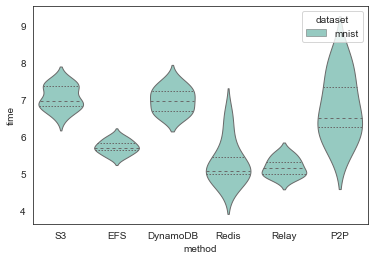

In [113]:
sns.violinplot(x="method", y="time", hue="dataset", data=df.query('rank==0'), inner="quart", linewidth=1, palette="Set3")

In [114]:
   
# COSTS
for i, row in df.query('rank == 0').iterrows():
    key_rows = df.query(f'key == "{row["key"]}"')
    df.at[i, 'usage'] = reduce(sum_usage, list(key_rows['usage']))

# Only master
df = df.query('rank == 0').drop(columns=['rank', 'key'])
# Milliseconds
df['time'] = df['time'] * 1000

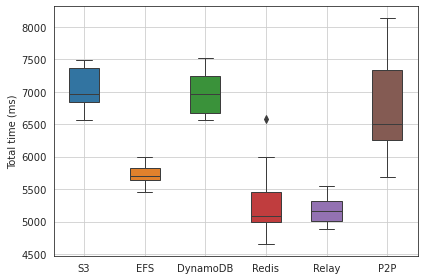

In [115]:
# df.query('count == 4').boxplot(by="method", column=["time"], figsize=(10, 6))
# df.query('count == 6').boxplot(by="method", column=["time"], figsize=(10, 6))
# df.query('count == 10').boxplot(by="method", column=["time"], figsize=(10, 6))
# df.query('count == 20').boxplot(by="method", column=["time"], figsize=(10, 6))

plt.rcParams['font.family'] = 'Linux Libertine'
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(6, 4))
sns.boxplot(data=df.query('count == 6'), x='method', y='time', width=0.5, linewidth=1)
plt.grid(True)
sns.set_style("white")
# plt.ylim(0, df.query('count == 6').time.max() + 0.5)
plt.xlabel(None)
plt.ylabel('Total time (ms)')
# plt.ylim(0, 1100)
plt.tight_layout()

plt.savefig("img/e2e-e2e.svg")


In [116]:
# COSTS
PRICES = {
    "s3:GetObject": 0.0004 / 1000,
    "s3:PutObject": 0.005 / 1000,

    # per 4kb
    "dynamodb:GetItem": 0.25 / 1000000,
    "dynamodb:PutItem": 1.25 / 1000000,

    # per 4kb
    "efs:read": 0.03 / 1000 / 250,
    "efs:write": 0.06 / 1000 / 250,
    # per read (suppose it's less than 4kb)
    "efs:listdir": 0.03 / 1000 / 250,
}

PRICE_PER_GBS_OF_LAMBDA = 0.0000166667
GBS = 10

four_kb_blocks = 100
full_downloads = 5 * 20

def usage_to_columns(df):
  keys = set()
  for item in df.usage.tolist():
      keys.update(item.keys())
  # keys


  # add keys to dataframe
  for key in keys:
      df[key] = df.usage.apply(lambda x: x.get(key, 0))

  # df.head() 

  # remove usage column
  df = df.drop(columns=['usage'])

  return df

def multiply_calls_by_4kb_blocks(row):
  if row['dynamodb:PutItem'] != 0:
    row['dynamodb:PutItem'] *= four_kb_blocks
  
  if row['dynamodb:GetItem'] != 0:
    # Last read is full read
    row['dynamodb:GetItem'] = row['dynamodb:GetItem'] - full_downloads + four_kb_blocks * full_downloads

  if row['efs:read'] != 0:
    # Last read is full read
    row['efs:read'] = row['efs:read'] - full_downloads + full_downloads * four_kb_blocks

  if row['efs:write'] != 0:
    row['efs:write'] *= four_kb_blocks

  return row
    

df = usage_to_columns(df)
df = df.apply(multiply_calls_by_4kb_blocks, axis=1)

df['cost'] = df['efs:listdir'] * PRICES['efs:listdir'] + \
            df['efs:read'] * PRICES['efs:read'] + \
            df['efs:write'] * PRICES['efs:write'] + \
            df['dynamodb:PutItem'] * PRICES['dynamodb:PutItem'] + \
            df['dynamodb:GetItem'] * PRICES['dynamodb:GetItem'] + \
            df['s3:GetObject'] * PRICES['s3:GetObject'] + \
            df['s3:PutObject'] * PRICES['s3:PutObject']

df.head()

# 100 runs
df['cost'] = df['cost'] * 100

df['lambda_cost'] = GBS * PRICE_PER_GBS_OF_LAMBDA * df['time'] / 1000 * df['count'] * 100

df = df[['count', 'dataset', 'method', 'time', 'cost', 'lambda_cost']]

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 5 to 353
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        59 non-null     int64  
 1   dataset      59 non-null     object 
 2   method       59 non-null     object 
 3   time         59 non-null     float64
 4   cost         59 non-null     float64
 5   lambda_cost  59 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.2+ KB


,count,dataset,method,time,cost,lambda_cost
5,6,mnist,Redis,4646.596432,0.0,0.464661
11,6,mnist,Redis,5116.516113,0.0,0.511653
17,6,mnist,Redis,5055.120707,0.0,0.505513
23,6,mnist,Redis,5004.931927,0.0,0.500494
29,6,mnist,Redis,5994.218826,0.0,0.599423


In [117]:

print("Average cost in USD and latency in ms per method and size (per 100 runs).")
df.query('count in [4, 6, 10]').groupby(['method', 'count']).mean().style.format('{:.2f}').background_gradient(cmap='Blues')

Average cost in USD and latency in ms per method and size (per 100 runs).


,,time,cost,lambda_cost
method,count,,,
DynamoDB,6,6989.98,0.85,0.70
EFS,6,5723.97,0.23,0.57
P2P,6,6804.29,0.00,0.68
Redis,6,5318.25,0.00,0.53
Relay,6,5183.17,0.00,0.52
S3,6,7058.81,0.09,0.71


<AxesSubplot:xlabel='method'>

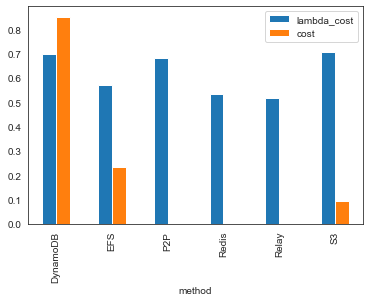

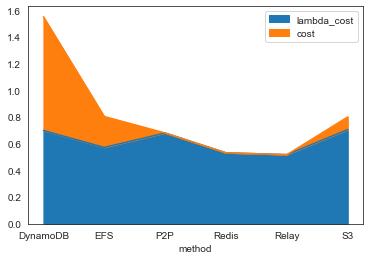

In [118]:
data = df.query('count == 6').groupby('method').mean()[['lambda_cost', 'cost']].plot(kind="bar")
data = df.query('count == 6').groupby('method').mean()[['lambda_cost', 'cost']].plot(kind="area")
data
# plt.figure(figsize=(6, 4))
# plt.bar(data.index, data['cost'], label='Cost', color='#1f77b4')
# plt.grid(True)
# sns.set_style("white")
# # plt.ylim(0, df.query('count == 6').time.max() + 0.5)
# plt.xlabel(None)
# plt.ylabel('Total time (ms)')
# # plt.ylim(0, 1100)
# plt.tight_layout()

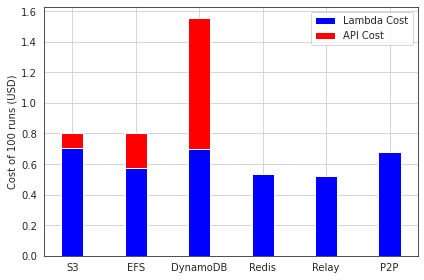

In [119]:
# # Suppose these are your method names
# methods = df.method.unique()

# method as category
df['method'] = df['method'].astype('category')

# reorder methods
df['method'] = df['method'].cat.reorder_categories([
    "S3",
    "EFS",
    "DynamoDB",
    "Redis",
    "Relay",
    "P2P"
])

# And these are your mean costs from the dataframe
mean_lambda_cost = df.query('count == 6').groupby('method').mean()['lambda_cost']
mean_cost = df.query('count == 6').groupby('method').mean()['cost']

methods = mean_lambda_cost.index

# Defining the bar width
barWidth = 0.35

plt.rcParams['font.family'] = 'Linux Libertine'
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(6, 4))

plt.bar(methods, mean_lambda_cost, color ='b', width = barWidth, label ='lambda_cost')
plt.bar(methods, mean_cost, color ='r', width = barWidth , bottom = mean_lambda_cost, label ='mean_cost')

# plt.xlabel('Method')
plt.ylabel('Cost of 100 runs (USD)')
plt.legend(['Lambda Cost', 'API Cost'])
plt.grid()
plt.tight_layout()


plt.savefig("img/e2e-cost.svg")


### Microbenchmark

In [120]:
df = load_data("../results/e2e-broadcast-better-gather-5/*.jsonl")
# Only keep the master
df = df.query('rank == 0').drop(columns=['rank', 'key'])

# time in ms
df['time'] = df['time'] * 1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   key      1200 non-null   object  
 1   rank     1200 non-null   int64   
 2   count    1200 non-null   int64   
 3   dataset  1200 non-null   category
 4   epochs   1200 non-null   int64   
 5   method   1200 non-null   category
 6   time     1200 non-null   float64 
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 49.7+ KB


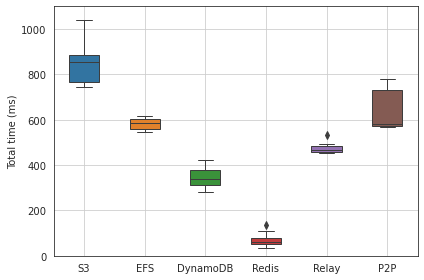

In [121]:
# df.query('count == 4').boxplot(by="method", column=["time"], figsize=(10, 6))
# df.query('count == 6').boxplot(by="method", column=["time"], figsize=(10, 6))
# df.query('count == 10').boxplot(by="method", column=["time"], figsize=(10, 6))
# df.query('count == 20').boxplot(by="method", column=["time"], figsize=(10, 6))

plt.rcParams['font.family'] = 'Linux Libertine'
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(6, 4))
sns.boxplot(data=df.query('count == 6'), x='method', y='time', width=0.5, linewidth=1)
plt.grid(True)
sns.set_style("white")
plt.ylim(0, df.query('count == 6').time.max() + 0.5)
plt.xlabel(None)
plt.ylabel('Total time (ms)')
plt.ylim(0, 1100)
plt.tight_layout()

plt.savefig("img/e2e-microbenchmark.svg")
